In [1]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader, batch_creator
from helpers import helpers, plotter
import os
import tensorflow as tf
import numpy as np

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D


In [3]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', d = d)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


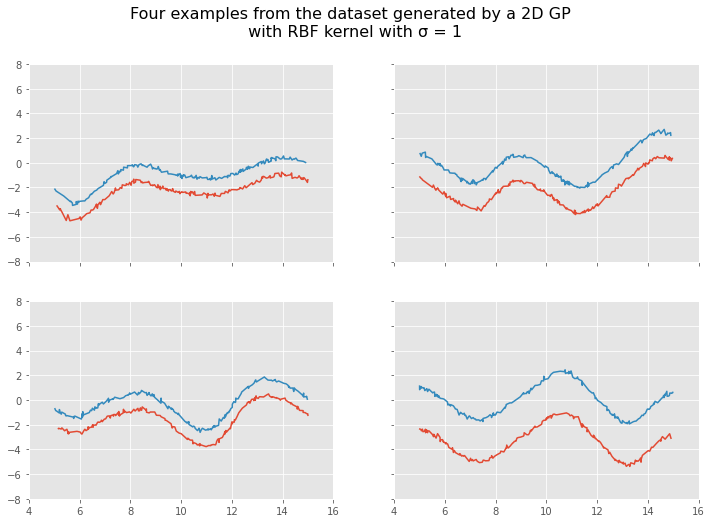

In [4]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [5]:
run = 7
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [6]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [7]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 10; order = True; consec = False
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = context, d = d); 

In [8]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads, input_vocab_size = 200)

In [9]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

In [10]:
data[2].shape

(30000, 400)

num_steps:  280
context_p:  50


NameError: name 'context_p' is not defined

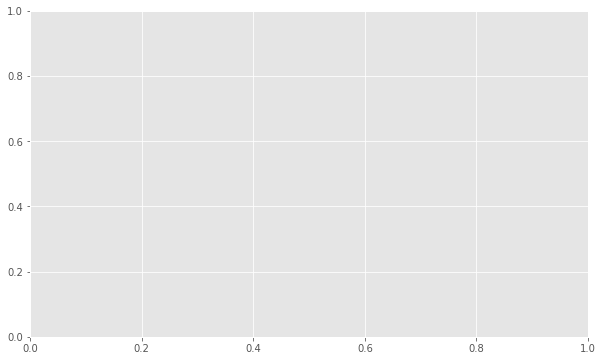

In [11]:
if d:
    idx = int(np.random.choice(np.arange(0, 30000, 1), 1))
    plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10, num_steps = 999, consec = consec, order = order, context_p = 50)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 100, context_p = context, order = order, consec = consec)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
sample # 0, r squared: -0.05106656657505426
sample # 1, r squared: -0.022403376056669755
sample # 2, r squared: -0.14786097988520952
sample # 3, r squared: -0.09447393177660701
sample # 4, r squared: -0.05183105485681727
sample # 5, r squared: -0.28559738001411117
sample # 6, r squared: -0.20897374110672318
sample # 7, r squared: -0.1562956749796529
sample # 8, r squared: -0.1189788263349214
sample # 9, r squared: -0.16024427972792732
sample # 0, r squared: -0.09267549546056197
sample # 1, r squared: -0.008517057901823666
sample # 2, r squared: -0.0681163705112049
sample # 3, r squared: -0.07766104544266161
sample # 4, r squared: -0.07082952364562578
sample # 5, r squared: -0.07696314187003317
sample # 6, r squared: -0.04080732489896244
sample # 7, r squared: -0.10181824380628712
sample # 8, r squared: -0.07081465723896962
sample # 9, r squared: 0.004783966565364728
['pad_pos_tr.npy

context:  50
sample # 0, r squared: 0.5463807810744987
sample # 1, r squared: 0.690826071163601
sample # 2, r squared: 0.5508578331578822
sample # 3, r squared: 0.24811581854841147
sample # 4, r squared: 0.6570904538694033
sample # 5, r squared: 0.4515312578537758
sample # 6, r squared: 0.6380732483021689
sample # 7, r squared: 0.8011477382752367
sample # 8, r squared: 0.7259449602383128
sample # 9, r squared: 0.7077617087049001
Does not exists
context:  50
sample # 0, r squared: 0.9745643887080081
sample # 1, r squared: 0.9821293044215228
sample # 2, r squared: 0.9780195747206651
sample # 3, r squared: 0.9802707664904351
sample # 4, r squared: 0.9805134871005167
sample # 5, r squared: 0.977721191529407
sample # 6, r squared: 0.9802332436840852
sample # 7, r squared: 0.9797488449016754
sample # 8, r squared: 0.9783909739403748
sample # 9, r squared: 0.9805516435023388
['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy',

sample # 0, r squared: -0.616140564723233
sample # 1, r squared: -0.28452073152424706
sample # 2, r squared: -0.508287634050858
sample # 3, r squared: -0.348102019115222
sample # 4, r squared: -0.5012514147937714
sample # 5, r squared: -0.5122417883819905
sample # 6, r squared: -0.35792274100229005
sample # 7, r squared: -0.16762603110399565
sample # 8, r squared: -0.4704198594351636
sample # 9, r squared: -0.2842789269989541


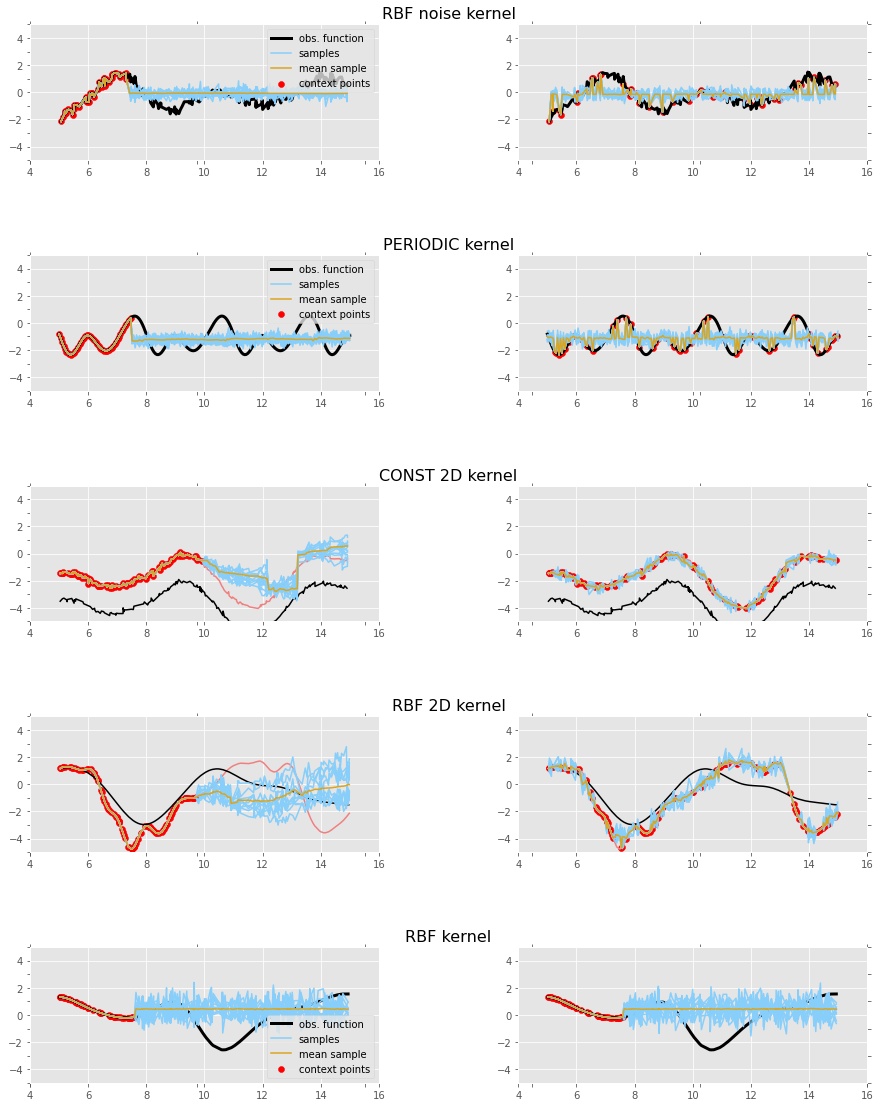

In [2]:
plotter.all_inference(consec = True)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.987) + WhiteKernel(noise_level=0.0516)
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.91) + WhiteKernel(noise_level=0.0523)
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1.09, periodicity=3.02)
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1, periodicity=9.02)
['.DS_Store', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=0.974)
RBF(length_scale=1)
RBF(length_scale=0.991)


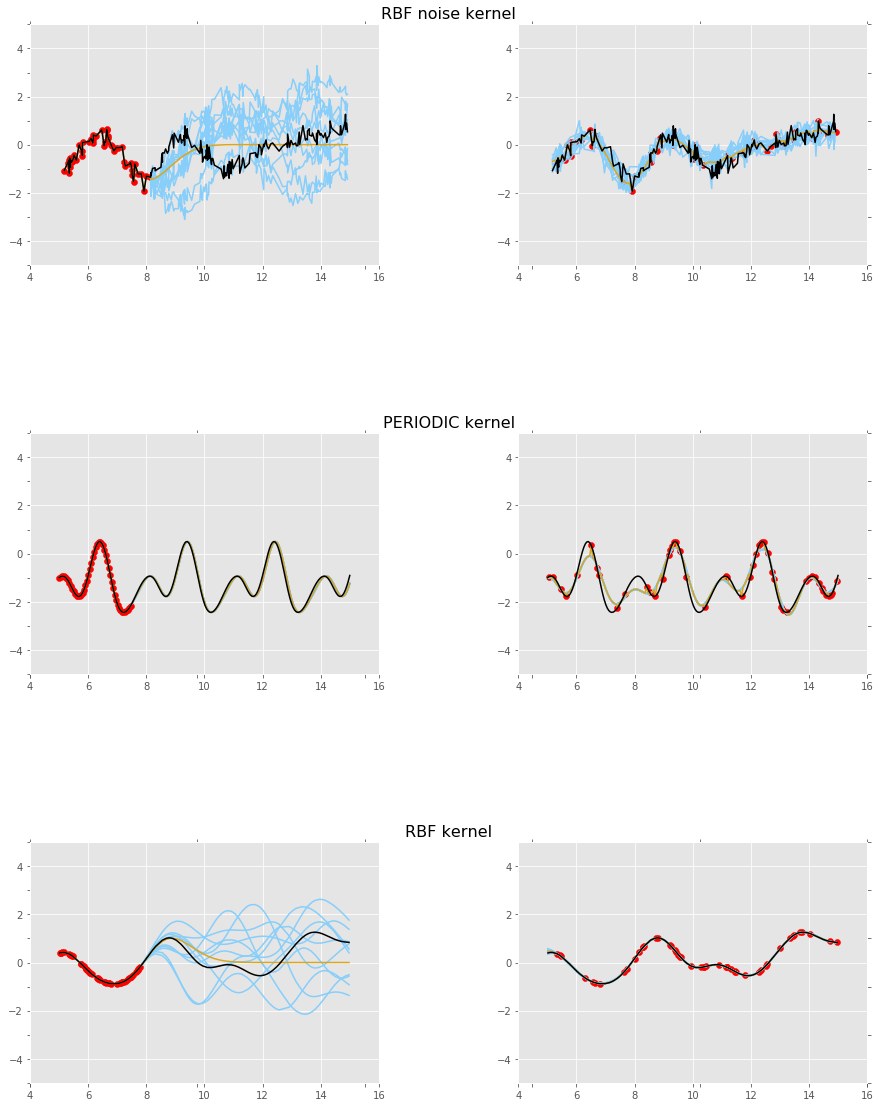

In [3]:
plotter.GP_infer1D()